## Exercise 1 - Bayes classification system

In [35]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [36]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [37]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [38]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [39]:
# TODO: Compute the priors

not_admitted = np.array([label for label in y_train if label == 0])
admitted = np.array([label for label in y_train if label == 1])

PC0 = len(not_admitted) / len(y_train)
PC1 = len(admitted) / len(y_train)
print("Probability of not admitted :", PC0)
print("Probability of admitted :", PC1)


Probability of not admitted : 0.4
Probability of admitted : 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

Text(0.5, 1.0, 'Histogram of x2 for admitted students')

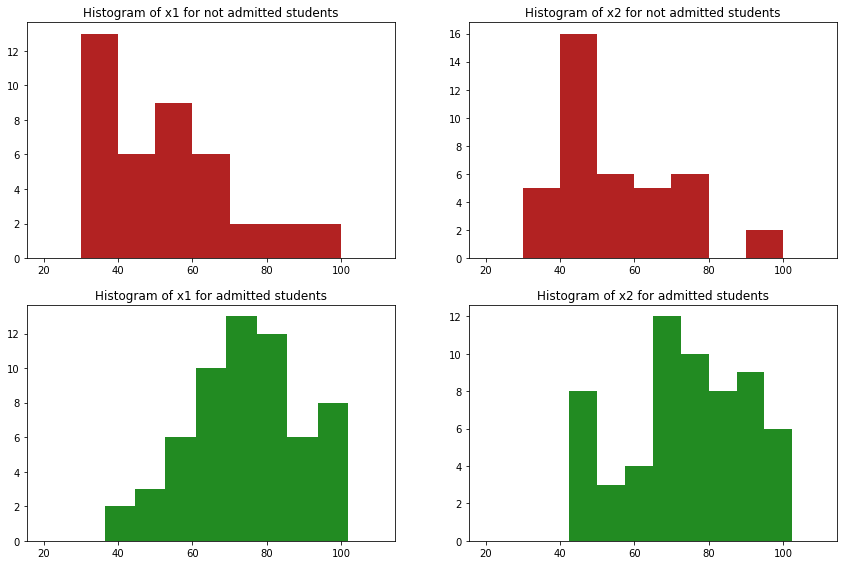

In [40]:
# TODO: Compute histograms

x1_not = [x1 for x1,y in zip(X_train["x1"],y_train) if y == 0]
x2_not = [x2 for x2,y in zip(X_train["x2"],y_train) if y == 0]
x1_yes = [x1 for x1,y in zip(X_train["x1"],y_train) if y == 1]
x2_yes = [x2 for x2,y in zip(X_train["x2"],y_train) if y == 1]


# TODO: plot histograms

plt.subplots_adjust(left=0.125, right=2, bottom=0.1, top=1.9, wspace=0.2, hspace=0.2)
plt.subplot(2, 2, 1)
hist_x1_C0, edge_x1_C0, _ = plt.hist(x1_not, range=[20, 110], bins='auto', color="firebrick")
plt.title("Histogram of x1 for not admitted students")

plt.subplot(2, 2, 2)
hist_x2_C0, edge_x2_C0, _ = plt.hist(x2_not, range=[20, 110], bins='auto', color='firebrick')
plt.title("Histogram of x2 for not admitted students")

plt.subplot(2, 2, 3)
hist_x1_C1, edge_x1_C1, _ = plt.hist(x1_yes, range=[20, 110], bins='auto',  color='forestgreen')
plt.title("Histogram of x1 for admitted students")

plt.subplot(2, 2, 4)
hist_x2_C1, edge_x2_C1, _ = plt.hist(x2_yes, range=[20, 110], bins='auto', color='forestgreen')
plt.title("Histogram of x2 for admitted students")


#plt.figure(figsize=(16,6))

#plt.subplot(1, 2, 1)
#...
#plt.xlabel('Likelihood hist - Exam 1')

#plt.subplot(1, 2, 2)
#...
#plt.xlabel('Likelihood hist - Exam 2')

#plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [41]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    last_edge = bin_edges[0]
    for number, edge in zip(hist_values, bin_edges[1:]):
        if x > last_edge and x <= edge:
            return number / sum(hist_values)
        last_edge = edge

def p_x1_C0(x):
    return likelihood_hist(x, hist_x1_C0, edge_x1_C0)

def p_x2_C0(x):
    return likelihood_hist(x, hist_x2_C0, edge_x2_C0)

def p_x1_C1(x):
    return likelihood_hist(x, hist_x1_C1, edge_x1_C1)

def p_x2_C1(x):
    return likelihood_hist(x, hist_x2_C1, edge_x2_C1)

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [42]:
X_test, y_test = read_data("ex1-data-test.csv")

def bayes_classifier_x1(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x1"""
    return 0 if p_x1_C0(x1) * PC0 > p_x1_C1(x1) * PC1 else 1

def bayes_classifier_x2(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x2"""
    return 0 if p_x2_C0(x2) * PC0 > p_x2_C1(x2) * PC1 else 1

def bayes_classifier_x1_x2(x1, x2, PC0=PC0, PC1=PC1):
    """Bayes with feature x1 and x2"""
    return 0 if (p_x1_C0(x1) * PC0 * p_x2_C0(x2) * PC0) > (p_x1_C1(x1) * PC1 * p_x2_C1(x2) * PC1) else 1

def predict(X_test, classifier_function):
    predicted = []
    for x1,x2 in zip(X_test["x1"],X_test["x2"]):
        predicted.append(classifier_function(x1, x2))
    return np.array(predicted)

def control(classifier_function):
    nb_correct = 0
    for x1, x2, correct in zip(X_test["x1"],X_test["x2"],y_test):
        guess = classifier_function(x1, x2)
        nb_correct += 1 if guess == correct else 0
    print(f"Performance : {nb_correct / len(X_test)}")

classifiers = [bayes_classifier_x1, bayes_classifier_x2, bayes_classifier_x1_x2]
for classifier in classifiers:
    print(classifier.__doc__, ":")
    control(classifier)

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0
Bayes with feature x1 :
Performance : 0.62
Bayes with feature x2 :
Performance : 0.74
Bayes with feature x1 and x2 :
Performance : 0.89


In [46]:
# TODO: predict on test set in the 3 cases described above

predicted_v1 = predict(X_test,bayes_classifier_x1)

predicted_v2 = predict(X_test,bayes_classifier_x2)

predicted_v3 = predict(X_test,bayes_classifier_x1_x2)


print(f"accuracy with x1 :\n{accuracy_score(y_test, predicted_v1)}")
print(f"accuracy with x2 :\n{accuracy_score(y_test, predicted_v2)}")
print(f"accuracy with x1 and x2 :\n{accuracy_score(y_test, predicted_v3)}")

accuracy with x1 :
0.62
accuracy with x2 :
0.74
accuracy with x1 and x2 :
0.89


Which system is the best ?

TODO: answer

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [ ]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs

    return ...

In [ ]:
# TODO: Compute mean and variance for each classes and each features (8 values)



In [ ]:
# TODO: predict on test set in the 3 cases

y_pred = []

...

accuracy_score(y_test, y_pred)